<a href="https://colab.research.google.com/github/Vjfrib/ED/blob/main/Semin%C3%A1rio%2C_Estrutura_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminário sobre Algoritmos em Grafos - ED
*Prof. Dr. Cleyton Mário*
<br>
*Disc. Vinícius Ribeiro*

# Algoritmo de Hierholzer

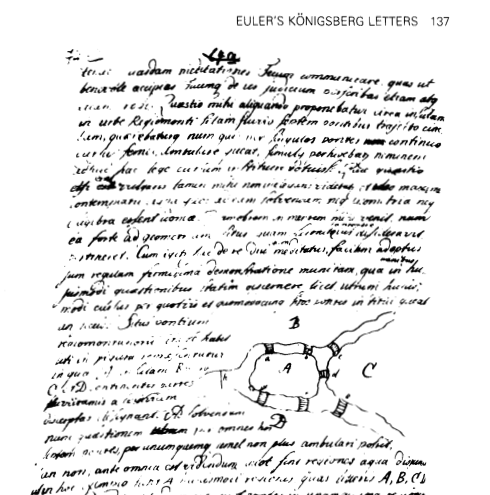

# Contextualização
## História
Texto com citação.

O Algoritmo de Hierholzer, desenvolvido pelo matemático Carl Hierholzer em 1873[^1], é uma abordagem pioneira na teoria dos grafos para encontrar ciclos eulerianos. Hierholzer apresentou o algoritmo ao investigar a existência de tais ciclos.

[^1]: [CORMEN, Thomas. Introduction to algorithms](https://www.cin.ufpe.br/~ara/algoritmos-%20portugu%C3%AAs-%20cormen.pdf).

#### Sobre Grafo euleriano

> Todo grafo em que o grau da aresta (qnt. de vértices que entram na aresta) é ***PAR***

## Funcionamento
O Algoritmo de Hierholzer é utilizado para encontrar um ciclo euleriano em um grafo. Um ciclo euleriano percorre todas as arestas do grafo retornando ao vértice inicial.

 O algoritmo começa em um vértice inicial com arestas e constrói um ciclo, buscando subciclos em vértices com arestas não percorridas, __incorporando esses subciclos ao ciclo principal__ até que todas as arestas sejam percorridas.



### Descrição Formal
$$
\begin{align*}
1. & \text{ O grafo } G = (V, E) \text{ deve ser conexo.} \\
   & \text{(Um grafo onde todos os vértices estão conectados entre si).} \\ \\
2. & \text{ Todos os vértices } v \in V \text{ devem ter um grau par, ou seja, } \deg(v) \text{ é par.} \\
   & \text{} \\ \\
3. & \text{ Dado um grafo } G = (V, E): \\ \\
   1. & \text{Escolha um vértice inicial } v_0 \text{ tal que } \deg(v_0) > 0. \\
      & \text{(Selecionar o vértice } v_0 \text{ e suas arestas).} \\ \\
   2. & \text{Construa um ciclo começando em } v_0 \text{ até retornar a } v_0. \\
      & \text{Exemplo: } v_0 \rightarrow v_1 \rightarrow v_2 \rightarrow v_3 \rightarrow v_0. \\ \\
   3. & \text{Enquanto houver vértices no ciclo atual que tenham arestas não percorridas, faça:} \\
      & \text{O ciclo atual é } v_0 \rightarrow v_1 \rightarrow v_2 \rightarrow v_3 \rightarrow v_0. \\ \\
      a. & \text{Selecione um desses vértices } v_i. \\
         & \text{seleciona } v_2. \\ \\
      b. & \text{Construa um subciclo começando em } v_i \text{ até retornar a } v_i. \\
         & \text{Exemplo: } v_2 \rightarrow v_4 \rightarrow v_5 \rightarrow v_2. \\ \\
      c. & \text{Incorpore o subciclo ao ciclo principal.} \\
   4. & \text{Repita o processo até que todas as arestas sejam percorridas.} \\
      &  \\
\end{align*}
$$



começo recebendo um grafo e na função inicio duas pilhas (a sub(s), de operações e a (t) para trajeto final

1. no grafo, Inicio do $v_0$ e faço $v_1, v_2, v_3.$

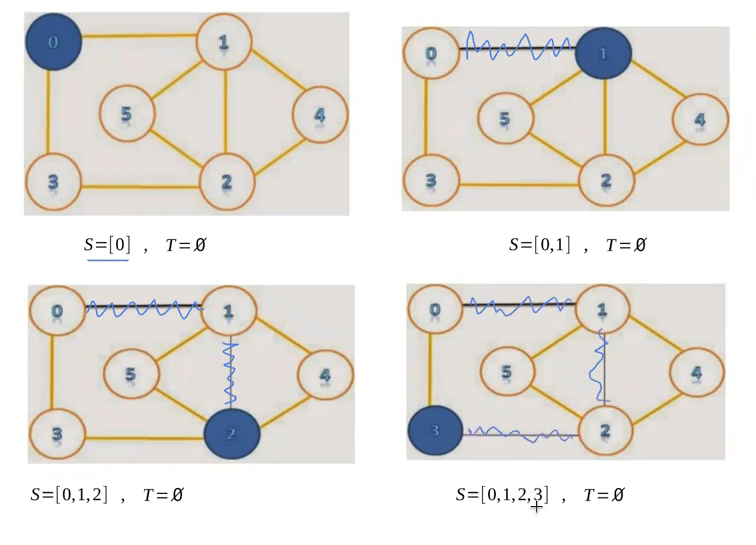


2. fecho o ciclo até $v_0$. como $0$ não tem mais arestas, salvo ele na pilha T e sigo para analisar o ultimo da pilha sub (s)
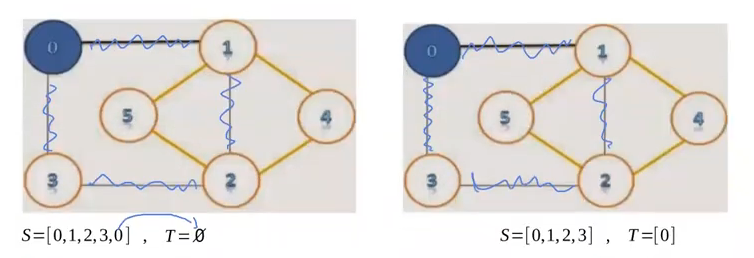

3. Em $v_3$ coincidiu de todas as arestas estarem marcadas tbm. passo $v_3$ para a pilha main e prossigo

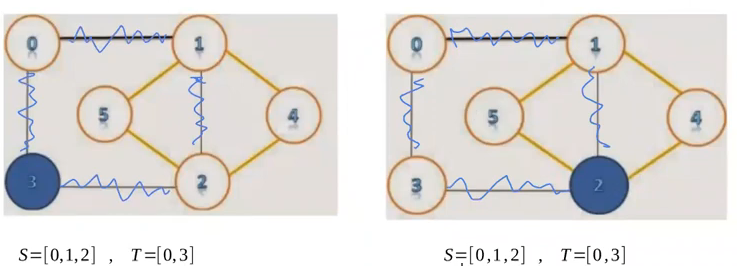

4. chegando em $v_2$ vejo que tenho as opções de v4 e v5 para ir. vou para v4 e coloco-o na pilha sub

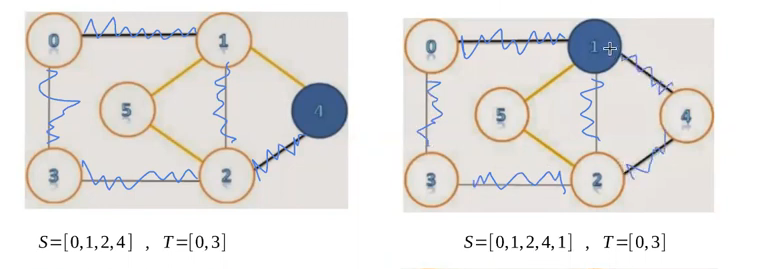

tenho a aresta v4 -> v1 livre, então percorro / marco o caminho e coloco v1 novamente na pilha sub, para registrar minha chegada lá.

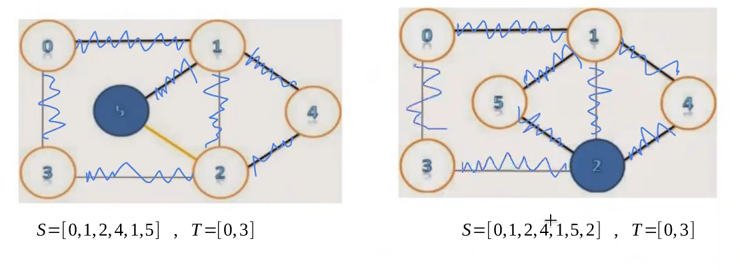

do 1 para o 5, do 5 para o 2 e assim percorri todo o grafo. agr farei o desempilhamento para obter o trajeto T otimizado

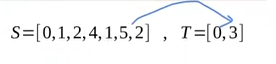

com isso, o tour de euler fica:

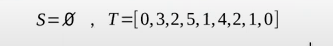

---


### Contextos de Aplicação
- **Roteamento e Logística:** Planejamento de rotas que percorrem todas as estradas ou caminhos uma única vez.
- **Design de Circuitos:** Em projetos de circuito é necessário percorrer todas as conexões.

### Vantagens
- **Simplicidade:** O algoritmo é direto e relativamente fácil de implementar.
- **Eficiência:** Opera em tempo linear em relação ao número de arestas do grafo, \( O(E) \).
- **Aplicabilidade Específica:** Ideal para problemas que requerem a identificação de ciclos eulerianos.

### Desvantagens
- **Requisitos Estritos:** **Limitado a Ciclos Eulerianos**. Só pode ser aplicado em grafos onde todos os vértices têm grau par e o grafo é conexo.
-  Não é útil para outros tipos de problemas em grafos, como ciclos hamiltonianos ou caminhos mínimos.

---

# Apresentação do Código

In [2]:
def hierholzer(grafo):
    S = []  # Pilha sub para os vértices visitados
    T = []  # Pilha para o trajeto

    # Encontra um vértice inicial com grau maior que 0, começando pelo vértice 0
    verticeAtual = min(grafo.keys())  # Encontra o vértice de menor valor no grafo
    S.append(verticeAtual)  # Adiciona o vértice inicial à pilha S

    while S: # enquanto não tiver esvaziado
        if grafo[verticeAtual]:
            proxVertice = grafo[verticeAtual].pop()  # seleciona / remove uma aresta para o próximo vértice
            if verticeAtual in grafo[proxVertice]:
                grafo[proxVertice].remove(verticeAtual)  # Remove a aresta reversa apenas se existir
            verticeAtual = proxVertice  # Atualiza o vértice atual para o próximo vértice
            S.append(verticeAtual)  # Adiciona o próximo vértice à pilha S
        else:
            T.append(S.pop())  # Quando não há mais arestas, adiciona à pilha de caminho Euleriano

    return T[::-1]  # tive que inverter pra funfar

#### Complexidade do algol

$$\text{Matriz de adj.}\rightarrow O(V^2)$$
> a tendendecia é iterar o quadrado todo

$$\text{Listas de adj.} \rightarrow O(V^2)$$
> itera só a qnt. de Vértice sobrssalente (eu seleciono / marco o vertice dando pop msm)

In [17]:
# dependencias
!pip install networkx


In [3]:
# Exemplo de grafo
# coloquei em lista de adjacencia, pois posso dar pop na aresta.
g = { # feito com listas de adjacencias
    0: [1, 3], # Node e suas adjacencias
    1: [2, 4, 5],
    2: [1, 4, 5],
    3: [0, 2],
    4: [1, 2],
    5: [1, 2]
}

Ciclo Euleriano: [0, 3, 2, 5, 1, 4, 2, 1]


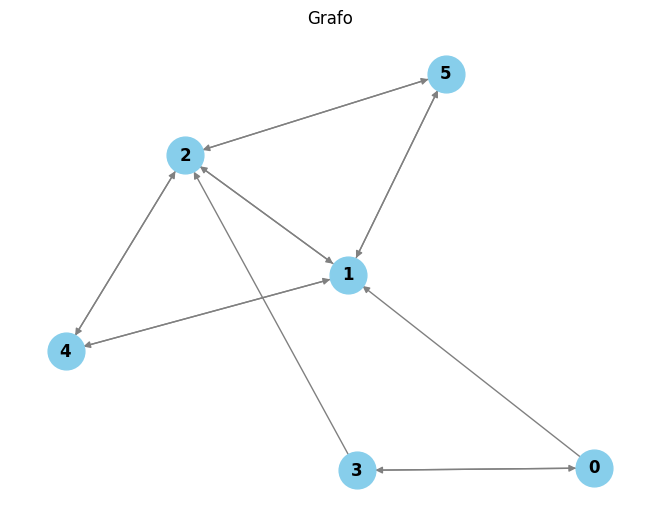

In [5]:
# Plot

import networkx as nx
import matplotlib.pyplot as plt

# Criando um objeto grafo direcionado
G = nx.DiGraph()

# Adicionando arestas ao grafo
for v in g:
    for u in g[v]:
        G.add_edge(v, u)

# Plotando o grafo
pos = nx.spring_layout(G)  # Layout para posicionar os nós
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_weight="bold", edge_color="gray")
plt.title("Grafo")
plt.show()


In [6]:
# Chamada do algol
ciclo = hierholzer(g)
print(ciclo)

[0, 3, 2, 5, 1, 4, 2, 1]


That's all!

---